## **Main Objective: Predict the Domestic Market (Contract) Blow Molding, Low price.**

In [1]:
#Imorting libraries

In [2]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from xgboost import XGBRegressor

from sklearn.preprocessing import MinMaxScaler

from sklearn.neural_network import MLPRegressor

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

from sklearn.impute import KNNImputer

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFECV
import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib.cm as cm

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [3]:
# mounting drive to import dataset
file_path = '/content/drive/MyDrive/Predict_blow_molding_dom/Random Price Dataset Trial Assignment.xlsx'
data1 = pd.read_excel(file_path)


In [4]:
#droping these features as it is having more than 70% Nan values
data1 = data1.drop(['Australia _export', 'Saudi_export'], axis=1)


In [5]:
data1['Date']
# In date column in dataframe values are Every first day of month Its a contineous data

0     2000-01-01
1     2000-02-01
2     2000-03-01
3     2000-04-01
4     2000-05-01
         ...    
271   2022-08-01
272   2022-09-01
273   2022-10-01
274   2022-11-01
275   2022-12-01
Name: Date, Length: 276, dtype: datetime64[ns]

In [6]:
# Create a sample DataFrame with monthly dates

dates = pd.date_range(start='2000-01-01', end='2022-12-01', freq='MS')
df = pd.DataFrame({'Date': dates})

In [7]:


# Convert dates to numerical contineous values of months
start_month = df['Date'].dt.month.min()
date = (df['Date'].dt.month - start_month) + 12 * (df['Date'].dt.year - df['Date'].dt.year.min())
date


0        0
1        1
2        2
3        3
4        4
      ... 
271    271
272    272
273    273
274    274
275    275
Name: Date, Length: 276, dtype: int64

In [8]:
type(df['Date'])

pandas.core.series.Series

In [9]:
data1.loc[:,'Date']=date
data1
#replaced original date column with New numeric data

,Date,"Domestic Market (Contract) Blow Molding, Low",Spot/Export Blow Molding,"Spot, Domestic",WTISPLC,MCOILBRENTEU,GASREGM,IMPCH,EXPCH,PRUBBUSDM,...,Russia_import,South_Africa_import,Turkey_import,Brazil_import,France_import,Germeny_import,United Kingdome_import,China_import,Japan_import,South_korea_import
0,0,41.0,NaN,NaN,27.18,25.51,1.289,6902.100000,863.100000,29.207387,...,NaN,NaN,6833222.0,2649293.0,35239920.0,NaN,NaN,NaN,NaN,NaN
1,1,41.0,NaN,NaN,29.35,27.78,1.377,6584.400000,972.700000,33.391099,...,NaN,NaN,5647987.0,2787667.0,36716752.0,NaN,NaN,NaN,NaN,NaN
2,2,45.0,NaN,NaN,29.89,27.49,1.516,6424.100000,1330.500000,30.941913,...,NaN,NaN,6721125.0,4692701.0,45144561.0,NaN,NaN,NaN,NaN,NaN
3,3,47.0,NaN,NaN,25.74,22.76,1.465,7070.500000,1227.500000,31.930148,...,NaN,NaN,7169182.0,2565068.0,32240349.0,NaN,NaN,NaN,NaN,NaN
4,4,47.0,NaN,NaN,28.78,27.74,1.487,7850.200000,1526.300000,31.201702,...,NaN,NaN,10466333.0,4671325.0,29351633.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,271,93.0,NaN,NaN,93.67,100.45,3.975,50348.836582,12906.699996,73.304558,...,NaN,19310108.0,NaN,NaN,NaN,144131334.0,81872550.0,NaN,26097012.0,NaN
272,272,90.0,NaN,NaN,84.26,89.76,3.700,49247.891499,11953.510580,66.956499,...,NaN,14410445.0,NaN,NaN,NaN,113310929.0,74477441.0,NaN,21277339.0,NaN
273,273,90.0,NaN,NaN,87.55,93.33,3.815,44571.967124,15698.339652,68.535729,...,NaN,16783023.0,NaN,NaN,NaN,119307001.0,109421098.0,NaN,NaN,NaN
274,274,90.0,NaN,NaN,84.37,91.42,3.685,36876.437049,15576.005996,65.265834,...,NaN,11079039.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:

data1.columns

Index(['Date', 'Domestic Market (Contract) Blow Molding, Low',
       'Spot/Export Blow Molding', 'Spot, Domestic', 'WTISPLC', 'MCOILBRENTEU',
       'GASREGM', 'IMPCH', 'EXPCH', 'PRUBBUSDM', 'WPUFD4111',
       'PCU325211325211', 'PCU32611332611301', 'WPU0915021625',
       'PCU3252132521', 'MHHNGSP', 'WPU072205011', 'PCU32611132611115',
       'PCU32611332611301.1', 'PCU32611132611112', 'WPU0915021622',
       'Producer Price Index by Industry: Plastics Material and Resins Manufacturing: Thermoplastic Resins and Plastics Materials ',
       'Canada_export', 'Usa_export', 'India_export', 'Russia_export',
       'South_Africa_export', 'Turkey', 'Brazil', 'France_export',
       'Germeny_export', 'United Kingdome_export', 'China_export',
       'Australia _import', 'Canada_import', 'Saudi_import', 'Usa_import',
       'India_import', 'Russia_import', 'South_Africa_import', 'Turkey_import',
       'Brazil_import', 'France_import', 'Germeny_import',
       'United Kingdome_import', 'China

In [11]:
# KNN imputer for treating the Nan values in dataset
knn_imputer = KNNImputer(n_neighbors=3)
array = knn_imputer.fit_transform(data1)
df1 = pd.DataFrame(array,columns=['Date', 'Domestic Market (Contract) Blow Molding, Low',
       'Spot/Export Blow Molding', 'Spot, Domestic', 'WTISPLC', 'MCOILBRENTEU',
       'GASREGM', 'IMPCH', 'EXPCH', 'PRUBBUSDM', 'WPUFD4111',
       'PCU325211325211', 'PCU32611332611301', 'WPU0915021625',
       'PCU3252132521', 'MHHNGSP', 'WPU072205011', 'PCU32611132611115',
       'PCU32611332611301.1', 'PCU32611132611112', 'WPU0915021622',
       'Producer Price Index by Industry: Plastics Material and Resins Manufacturing: Thermoplastic Resins and Plastics Materials ',
       'Canada_export', 'Usa_export', 'India_export', 'Russia_export',
       'South_Africa_export', 'Turkey', 'Brazil', 'France_export',
       'Germeny_export', 'United Kingdome_export', 'China_export',
       'Australia _import', 'Canada_import', 'Saudi_import', 'Usa_import',
       'India_import', 'Russia_import', 'South_Africa_import', 'Turkey_import',
       'Brazil_import', 'France_import', 'Germeny_import',
       'United Kingdome_import', 'China_import',
       'South_korea_import'])

In [12]:
df1
#imputation done

,Date,"Domestic Market (Contract) Blow Molding, Low",Spot/Export Blow Molding,"Spot, Domestic",WTISPLC,MCOILBRENTEU,GASREGM,IMPCH,EXPCH,PRUBBUSDM,...,India_import,Russia_import,South_Africa_import,Turkey_import,Brazil_import,France_import,Germeny_import,United Kingdome_import,China_import,South_korea_import
0,0.0,41.0,42.500000,49.250000,27.18,25.51,1.289,6902.100000,863.100000,29.207387,...,5.457669e+07,2.805095e+07,6.642333e+06,6.833222e+06,2.649293e+06,3.523992e+07,8.556510e+07,5.307057e+07,7.000567e+08,1.447336e+07
1,1.0,41.0,42.500000,49.250000,29.35,27.78,1.377,6584.400000,972.700000,33.391099,...,5.457669e+07,2.805095e+07,6.642333e+06,5.647987e+06,2.787667e+06,3.671675e+07,8.556510e+07,5.307057e+07,7.000567e+08,1.447336e+07
2,2.0,45.0,47.333333,53.000000,29.89,27.49,1.516,6424.100000,1330.500000,30.941913,...,5.711782e+07,2.019377e+07,8.221497e+06,6.721125e+06,4.692701e+06,4.514456e+07,9.644743e+07,5.455817e+07,7.622626e+08,1.348566e+07
3,3.0,47.0,47.333333,53.000000,25.74,22.76,1.465,7070.500000,1227.500000,31.930148,...,5.711782e+07,2.019377e+07,8.221497e+06,7.169182e+06,2.565068e+06,3.224035e+07,9.644743e+07,5.455817e+07,7.622626e+08,1.348566e+07
4,4.0,47.0,47.333333,53.000000,28.78,27.74,1.487,7850.200000,1526.300000,31.201702,...,9.237759e+07,2.019377e+07,1.189712e+07,1.046633e+07,4.671325e+06,2.935163e+07,1.001667e+08,7.327479e+07,7.622626e+08,1.348566e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,271.0,93.0,63.333333,79.833333,93.67,100.45,3.975,50348.836582,12906.699996,73.304558,...,1.203246e+08,2.414519e+07,1.931011e+07,3.396494e+07,1.017388e+07,5.131857e+07,1.441313e+08,8.187255e+07,6.144702e+08,2.609701e+07
272,272.0,90.0,63.333333,70.250000,84.26,89.76,3.700,49247.891499,11953.510580,66.956499,...,1.564345e+08,3.273850e+07,1.441044e+07,2.880739e+07,9.804504e+06,4.918838e+07,1.133109e+08,7.447744e+07,6.603307e+08,2.127734e+07
273,273.0,90.0,63.333333,82.500000,87.55,93.33,3.815,44571.967124,15698.339652,68.535729,...,1.551595e+08,2.540711e+07,1.678302e+07,2.114875e+07,8.970261e+06,3.834569e+07,1.193070e+08,1.094211e+08,6.745480e+08,2.526613e+07
274,274.0,90.0,36.333333,52.583333,84.37,91.42,3.685,36876.437049,15576.005996,65.265834,...,5.839171e+07,2.656439e+07,1.107904e+07,2.768518e+07,1.419043e+07,4.544377e+07,8.095464e+07,6.070141e+07,6.679013e+08,1.660185e+07


In [13]:
data = df1

In [14]:
import xgboost as xgb
from xgboost import plot_importance


In [15]:

class Data:
    data = df1
    def __init__(self, data):
        self.data = data
    

    def split(self, test_size=0.3, random_state=42):
        x = self.data.iloc[:, 2:].astype(float)
        y = self.data.iloc[:,1].astype(float)
        self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(x, y, test_size=test_size, random_state=random_state)

    def correlation_analysis(self):

        """ A method that performs correlation analysis between the features in the training set (x_train) and the target variable (y_train). 
        It computes the correlation coefficients between each feature and the target variable and sorts them in descending order."""

        self.split()
        corr_matrix = self.x_train.corrwith(self.y_train)
        corr_with_target = corr_matrix.sort_values(ascending=False)

        # convert the index to monthly periods
        # plot the historical trend of the confidence level
        ax = sns.lineplot(data=self.y_train)
        plt.figure(figsize=(15, 8))
        ax.set(xlabel='Date', ylabel='Confidence Level')
        ax.set_title('Historical Trend of Confidence Level')

        
        # identify the dates when the confidence level went down
        min_val = self.y_train.min()
        threshold = min_val + 0.05 * (self.y_train.max() - min_val)
        low_confidence_dates = self.y_train[self.y_train < threshold].index

       # plot the dates when the confidence level went down
        for date in low_confidence_dates:
          # convert the low confidence date to monthly period and plot a vertical line
          ax.axvline(x=date, color='red', linestyle='--', linewidth=1)

        plt.show()
        return corr_with_target

    def plot_confidence_level(self):
        self.correlation_analysis()

    def feature_importance_analysis(self):

        """ performs feature importance analysis using the XGBRegressor model 
        Normalization of data is done before it is passed to XGboost regressor"""
        self.split()
        self.scaler = MinMaxScaler()
        X_train_scaled = self.scaler.fit_transform(self.x_train)
        X_test_scaled = self.scaler.transform(self.x_test)
        model = xgb.XGBRegressor(n_estimators=1000)

        model.fit(X_train_scaled, self.y_train,
        eval_set=[(X_train_scaled, self.y_train), (X_test_scaled, self.y_test)],
        early_stopping_rounds=50,
       verbose=False)
        
        # plot feature importance
        plt.figure(figsize=(16, 10))
        sns.barplot(x=model.feature_importances_, y=self.x_train.columns)
        plt.title('Feature Importance')
        plt.xlabel('Importance')
        plt.ylabel('Features')
        plt.show()

    

In [24]:

class Model:
    def __init__(self, model):
      self.model = model
      self.data=data


    def fit(self, x_train, y_train):
        self.model.fit(x_train, y_train)

    def evaluation(self,x_train, y_train, x_test, y_test):

      """returns a dictionary of evaluation metrics. The evaluation metrics include the 
      R-squared score and mean squared error for both the training and testing sets, 
      as well as the root mean squared error for both the training and testing sets."""
      
      y_train_pred = self.model.predict(x_train)
      y_test_pred = self.model.predict(x_test)
      metrics = {}


      metrics['Train R^2'] = r2_score(y_train, y_train_pred)
      metrics['Test R^2'] = r2_score(y_test, y_test_pred)
      metrics['Train MSE'] = mean_squared_error(y_train, y_train_pred)
      metrics['Test MSE'] = mean_squared_error(y_test, y_test_pred)
      metrics['Train RMSE'] = np.sqrt(metrics['Train MSE'])
      metrics['Test RMSE'] = np.sqrt(metrics['Test MSE'])

        
      return metrics

    def predict(self,x_test):
        return self.model.predict(x_test)
       

In [26]:
class Regression:
    def __init__(self, data):
        self.data = Data(data)
        self.models = {
            'Linear Regression':LinearRegression(),
            'Adaboost Regression': AdaBoostRegressor(),
            'Random Forest': RandomForestRegressor(),
            'MLP': MLPRegressor(hidden_layer_sizes=(200,100), activation='relu', max_iter=1000,learning_rate_init=0.01)
            }
        self.scaler = MinMaxScaler()
        self.selected_features = None
        
    def run(self, time_steps):

        df_results = pd.DataFrame(columns=['Model', 'Time Step', 'RMSE train','RMSE test','MSE train','MSE test', 'R2 train','R2 test', 'Directional Accuracy'])
        for t in range(1, time_steps+1):
            print(f"Evaluating for t+{t}...")

            # Loop over different time steps from 1 to time_steps
            # Split the input data into training and testing sets using a 70/20 split
            self.data.split(test_size=0.2, random_state=42)
            X_train = self.data.x_train
            y_train = self.data.y_train
            X_test = self.data.x_test
            y_test = self.data.y_test

            # Perform feature selection using RFECV method
            rfecv = RFECV(estimator=LinearRegression(), step=1, cv=5, scoring='r2')
            rfecv.fit(self.data.x_train, self.data.y_train)
            self.selected_features = self.data.x_train.columns[rfecv.support_]

            # Normalize the training data using MinMaxScaler
            self.scaler.fit(X_train)
            x_train_norm = self.scaler.transform(X_train)
            x_test_norm = self.scaler.transform(X_test)

            # Select the features in the normalized training and test data
            x_train_norm = pd.DataFrame(x_train_norm, columns=self.data.x_train.columns)[self.selected_features]
            x_test_norm = pd.DataFrame(x_test_norm, columns=self.data.x_train.columns)[self.selected_features]

            for name, model in self.models.items():
                model_obj = Model(model)
                model_obj.fit(x_train_norm, y_train)
                y_pred_train = model_obj.predict(x_train_norm)
                y_pred_test = model_obj.predict(x_test_norm)
                rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
                rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
                mse_train = mean_squared_error(y_train, y_pred_train)
                mse_test = mean_squared_error(y_test, y_pred_test)
                r2_train = r2_score(y_train, y_pred_train)
                r2_test = r2_score(y_test, y_pred_test)
                da_test = np.sum(np.sign(y_test[1:] - y_pred_test[:-1]) == np.sign(y_pred_test[1:] - y_pred_test[:-1])) / (len(y_test) - 1)
                df_results = df_results.append({
                    'Model': name,
                    'Time Step': f"t+{t}",
                    'RMSE train': rmse_train,
                    'RMSE test': rmse_test,
                    'MSE train': mse_train,
                    'MSE test': mse_test,
                    'R2 train': r2_train,
                    'R2 test': r2_test,
                    'Directional Accuracy': da_test

                }, ignore_index=True)

            # Calculate and store different evaluation metrics such as RMSE, MSE, R2, and Directional Accuracy (DA) in a pandas DataFrame df_results


        return df_results


In [28]:
if __name__ =='__main__':
  data = Data.data
  project = Regression(data)
  result1 = project.run(time_steps=1)   # Next month predictions as we converted our data in number of months t+1
  result2 = project.run(time_steps=2)   # Next of next month prediction t+2
  result3 = project.run(time_steps=3)   # quarter t+3
  print(result3)


Evaluating for t+1...
Evaluating for t+1...
Evaluating for t+2...
Evaluating for t+1...
Evaluating for t+2...
Evaluating for t+3...
                  Model Time Step  RMSE train  RMSE test  MSE train  \
0     Linear Regression       t+1    4.142957   4.645129  17.164091   
1   Adaboost Regression       t+1    3.210598   4.405158  10.307942   
2         Random Forest       t+1    1.726553   3.528029   2.980985   
3                   MLP       t+1    4.527526   4.306979  20.498495   
4     Linear Regression       t+2    4.142957   4.645129  17.164091   
5   Adaboost Regression       t+2    3.262992   4.272570  10.647117   
6         Random Forest       t+2    1.673344   3.582180   2.800079   
7                   MLP       t+2    4.375642   4.275404  19.146244   
8     Linear Regression       t+3    4.142957   4.645129  17.164091   
9   Adaboost Regression       t+3    3.274785   4.395068  10.724219   
10        Random Forest       t+3    1.712236   3.275638   2.931751   
11              

**Random forest algorithm performs great in above case**

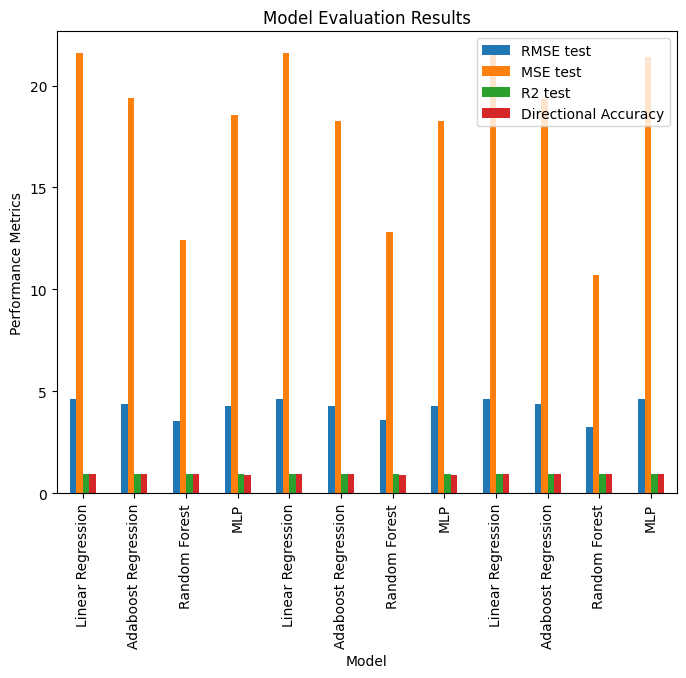

In [29]:
fig, ax = plt.subplots(figsize=(8,6))
result3.plot(x='Model', y=['RMSE test', 'MSE test', 'R2 test','Directional Accuracy' ], kind='bar', ax=ax)
ax.set_title('Model Evaluation Results')
ax.set_xlabel('Model')
ax.set_ylabel('Performance Metrics')
plt.show()

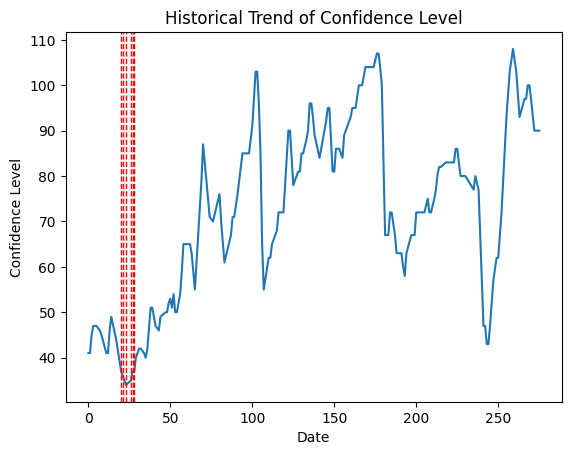

<Figure size 1500x800 with 0 Axes>

In [30]:

project2 = Data(data)
corr_with_target = project2.correlation_analysis()

**Here we can see that Red lines indicating Historical trend of condidence level goes down As we converted Date column in dataframe into monthly data so Its between 25th month around this level goes down**

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


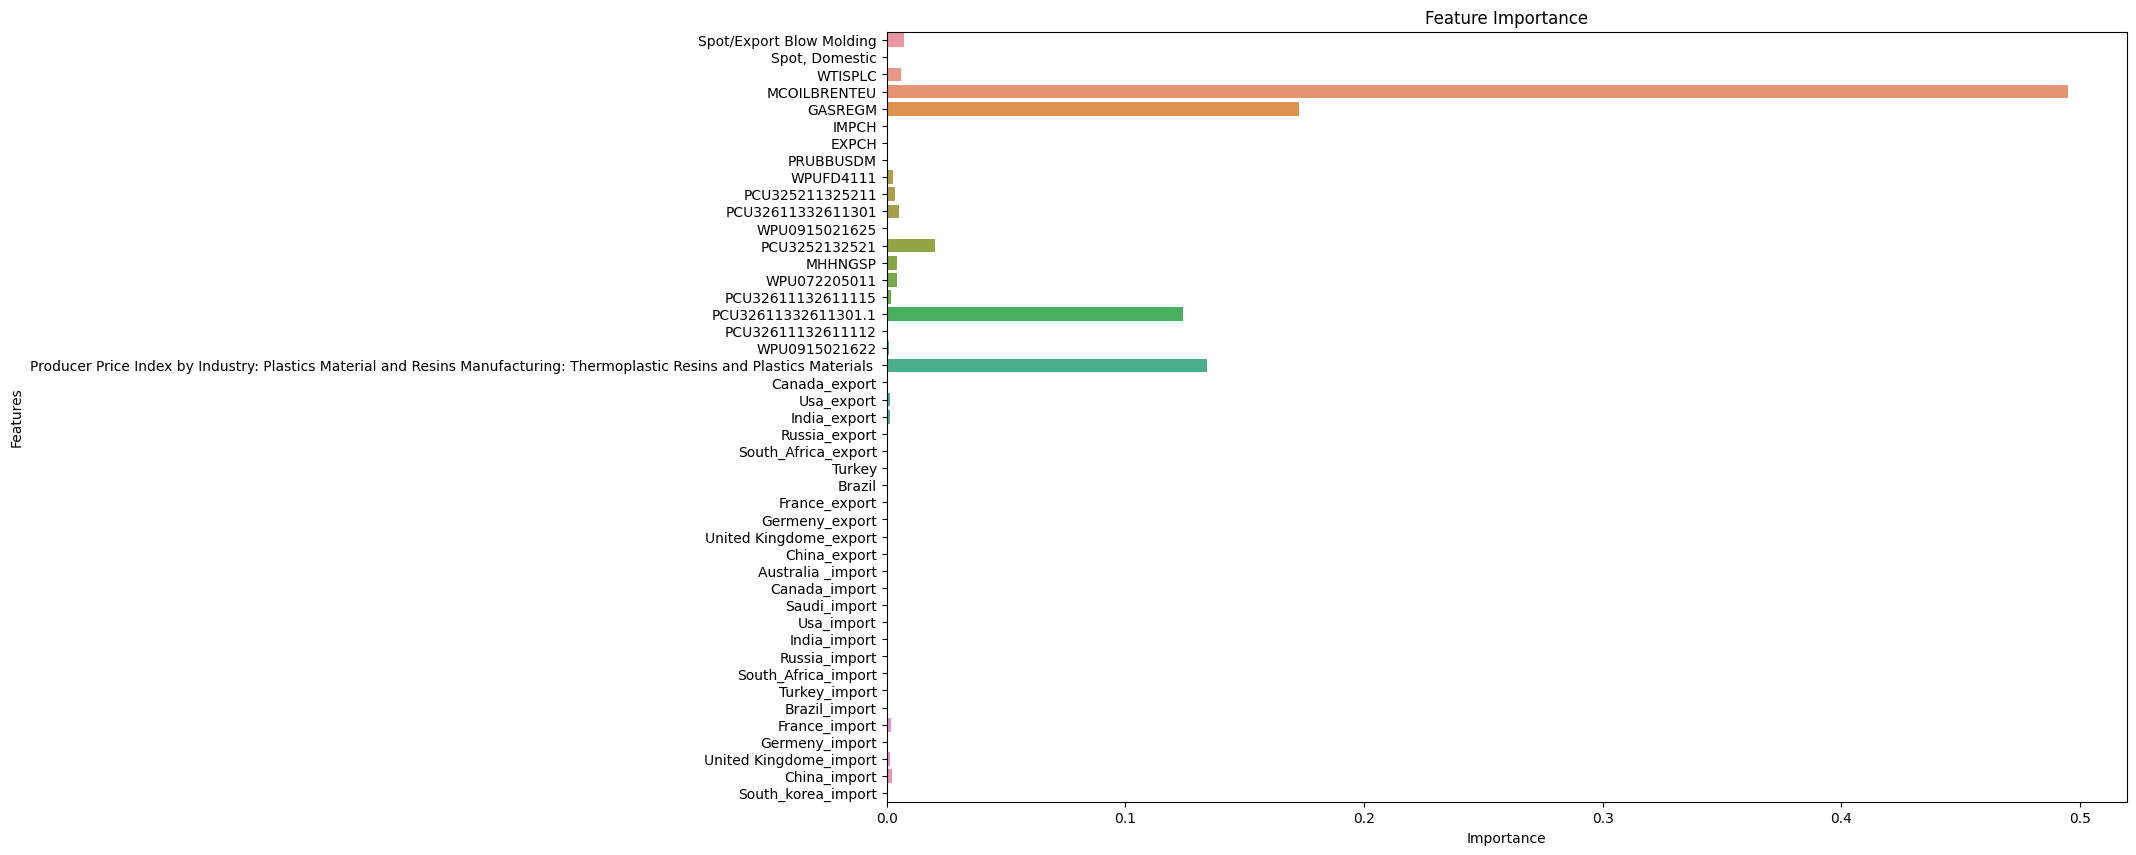

In [31]:
plot =project2.feature_importance_analysis()